In [ ]:
import pandas as pd

data = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
print(data['Sleep Disorder'].unique())

[nan 'Sleep Apnea' 'Insomnia']


In [ ]:
# Replace 'nan' with a label like 'None' or 'No Disorder'
import numpy as np
data['Sleep Disorder'].replace(np.nan, 'None', inplace=True)

<ipython-input-3-859a5213cd40>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sleep Disorder'].replace(np.nan, 'None', inplace=True)


In [ ]:
print(data['Sleep Disorder'].unique())

['None' 'Sleep Apnea' 'Insomnia']


In [ ]:
# descriptive statistics
descriptive_stats = data.describe()

# unique values in each categorical column
unique_values = {}
cat_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder', 'Blood Pressure']
for col in cat_columns:
    unique_values[col] = data[col].unique()

display(descriptive_stats, unique_values)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


{'Gender': array(['Male', 'Female'], dtype=object),
 'Occupation': array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
        'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
        'Salesperson', 'Manager'], dtype=object),
 'BMI Category': array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object),
 'Sleep Disorder': array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object),
 'Blood Pressure': array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
        '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
        '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
        '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
        '118/75'], dtype=object)}

In [ ]:
print(data.isnull().sum())  # Display the count of null values in each column
data.dropna(inplace=True)

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [ ]:
# Correcting the inconsistency in 'BMI Category'
data['BMI Category'].replace({'Normal Weight': 'Normal'}, inplace=True)

# Splitting the 'Blood Pressure' column into 'Systolic' and 'Diastolic' columns
data['Systolic'] = data['Blood Pressure'].str.split('/').str[0].astype(int)
data['Diastolic'] = data['Blood Pressure'].str.split('/').str[1].astype(int)

data.drop(['Blood Pressure','Person ID'], axis=1, inplace=True)

<ipython-input-7-1fd77674fd6a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BMI Category'].replace({'Normal Weight': 'Normal'}, inplace=True)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X = data.drop(['Sleep Disorder'], axis=1)
y = data['Sleep Disorder']

# Label encoding for categorical variables in X
label_encoders = {}  # To store the encoder objects for potential inverse transformations later

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encoding the target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)

X.head(), y[:5]

(   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
 0       1   27           9             6.1                 6   
 1       1   28           1             6.2                 6   
 2       1   28           1             6.2                 6   
 3       1   28           6             5.9                 4   
 4       1   28           6             5.9                 4   
 
    Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
 0                       42             6             2          77   
 1                       60             8             0          75   
 2                       60             8             0          75   
 3                       30             8             1          85   
 4                       30             8             1          85   
 
    Daily Steps  Systolic  Diastolic  
 0         4200       126         83  
 1        10000       125         80  
 2        10000       125         80  
 3         3000       14

In [ ]:
data.shape

(374, 13)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)  # You can specify a random state for reproducibility
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
data_resampled = pd.concat([X_resampled, pd.Series(y_resampled, name='Sleep Disorder')], axis=1)
data_resampled.shape

(657, 13)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your resampled data (excluding the target variable)
scaler.fit(data_resampled.drop('Sleep Disorder', axis=1))

# Transform the data using the fitted scaler
normalized_data = scaler.transform(data_resampled.drop('Sleep Disorder', axis=1))

# Create a new DataFrame with the normalized data and the target variable
normalized_data = pd.DataFrame(normalized_data, columns=data_resampled.drop('Sleep Disorder', axis=1).columns)
normalized_data['Sleep Disorder'] = data_resampled['Sleep Disorder']

normalized_data.head()  # To see the normalized data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic,Diastolic,Sleep Disorder
0,1.193463,-2.031457,1.480289,-1.171957,-0.888404,-0.906981,0.316328,0.858932,1.249391,-1.449278,-0.722221,-0.636744,1
1,1.193463,-1.913658,-1.176044,-1.045947,-0.888404,-0.016786,1.407285,-1.246734,0.832610,1.877838,-0.857176,-1.128332,1
2,1.193463,-1.913658,-1.176044,-1.045947,-0.888404,-0.016786,1.407285,-1.246734,0.832610,1.877838,-0.857176,-1.128332,1
3,1.193463,-1.913658,0.484164,-1.423977,-2.457440,-1.500444,1.407285,-0.193901,2.916514,-2.137647,1.167139,0.510293,2
4,1.193463,-1.913658,0.484164,-1.423977,-2.457440,-1.500444,1.407285,-0.193901,2.916514,-2.137647,1.167139,0.510293,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_data.drop('Sleep Disorder', axis=1), normalized_data['Sleep Disorder'], test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"--- {model_name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(report)
    print("\n")  # Add a separator between models

--- Logistic Regression ---
Accuracy: 0.8939393939393939
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.91      0.92      0.91        52
           2       0.90      0.92      0.91        51

    accuracy                           0.89       132
   macro avg       0.89      0.88      0.88       132
weighted avg       0.89      0.89      0.89       132



--- Random Forest ---
Accuracy: 0.9318181818181818
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.94      0.96      0.95        52
           2       0.94      0.94      0.94        51

    accuracy                           0.93       132
   macro avg       0.93      0.92      0.92       132
weighted avg       0.93      0.93      0.93       132



--- Support Vector Machine ---
Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           

--- Logistic Regression ---


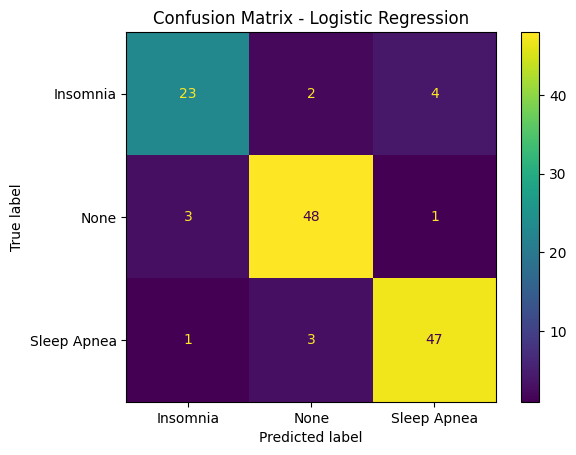



--- Random Forest ---


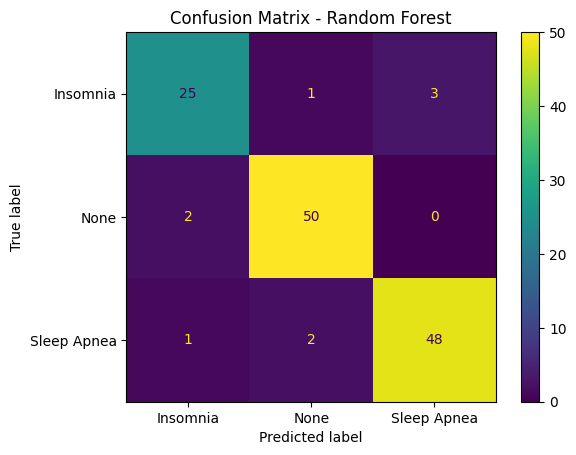



--- Support Vector Machine ---


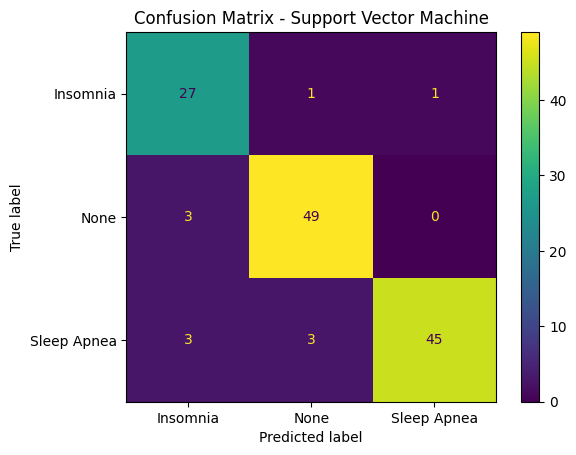

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# ... (your existing code for model initialization and training) ...


# Train and evaluate each model
for model_name, model in models.items():
    print(f"--- {model_name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    print("\n")

**Hybrid model by combining the predictions of a Logistic Regression model and a Random Forest model using simple averaging**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize individual models
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier(random_state=42)

# Train individual models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions using individual models
logreg_pred = logreg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Combine predictions using averaging
hybrid_pred = (logreg_pred + rf_pred) // 2  # Use integer division for class labels

# Evaluate hybrid model
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
hybrid_report = classification_report(y_test, hybrid_pred)

print("--- Hybrid Model ---")
print(f"Accuracy: {hybrid_accuracy}")
print(hybrid_report)

--- Hybrid Model ---
Accuracy: 0.8863636363636364
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        29
           1       0.82      0.94      0.88        52
           2       0.98      0.90      0.94        51

    accuracy                           0.89       132
   macro avg       0.89      0.87      0.88       132
weighted avg       0.89      0.89      0.89       132



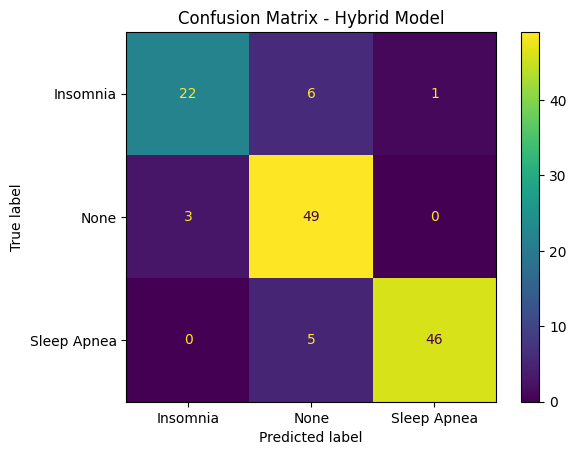

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ... (your existing code for model initialization and training) ...

# Initialize individual models
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier(random_state=42)

# Train individual models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions using individual models
logreg_pred = logreg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Combine predictions using averaging
hybrid_pred = (logreg_pred + rf_pred) // 2  # Use integer division for class labels

# Evaluate hybrid model
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
hybrid_report = classification_report(y_test, hybrid_pred)

# Print confusion matrix for hybrid model
cm_hybrid = confusion_matrix(y_test, hybrid_pred)
disp_hybrid = ConfusionMatrixDisplay(confusion_matrix=cm_hybrid, display_labels=le_target.classes_)
disp_hybrid.plot()
plt.title("Confusion Matrix - Hybrid Model")
plt.show()

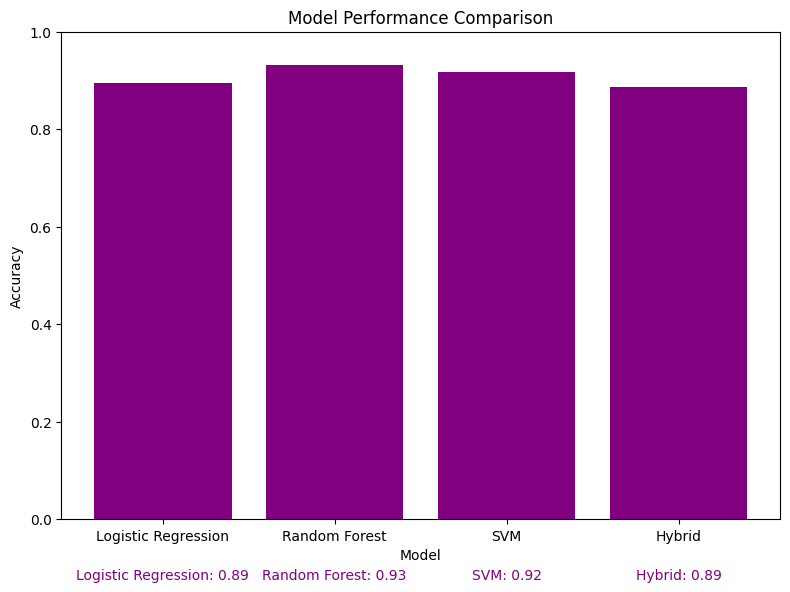

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Hybrid']
accuracies = [0.8939393939393939, 0.9318181818181818, 0.9166666666666666, 0.8863636363636364]  # Replace with actual accuracy values
colors = ['purple', 'purple', 'purple', 'purple']  # Colors for the bars and text

fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and axes object
bars = ax.bar(model_names, accuracies, color=colors)  # Plot bars on the axes
ax.set_title('Model Performance Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)  # Set y-axis limits

# Set x-axis ticks explicitly
ax.set_xticks(np.arange(len(model_names)))  # Set tick positions
ax.set_xticklabels(model_names)  # Set tick labels without rotation


# Add accuracy values below the graph with corresponding colors
for i, (model_name, accuracy, color) in enumerate(zip(model_names, accuracies, colors)):
    text_x = i  # X-coordinate for the text
    text_y = -0.1  # Y-coordinate for the text (below the graph)
    ax.text(text_x, text_y, f'{model_name}: {accuracy:.2f}',
            ha='center', va='top', color=color, transform=ax.transData)

plt.tight_layout()
plt.show()

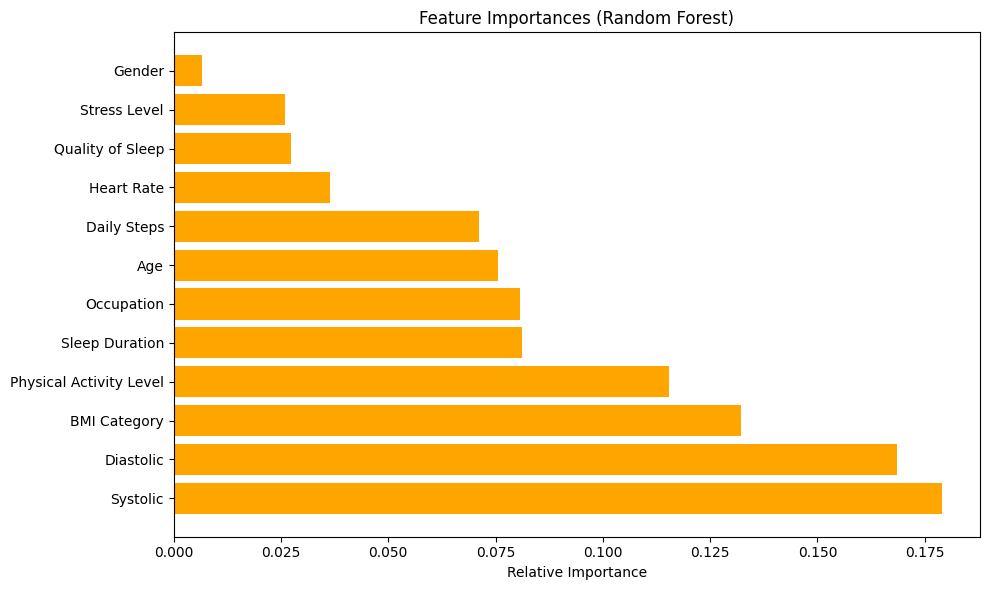

In [ ]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_
feature_names = X_train.columns  # Assuming X_train contains feature names

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Random Forest)')
plt.barh(range(X_train.shape[1]), importances[indices], align='center', color='orange')
plt.yticks(range(X_train.shape[1]), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

sample_data = pd.DataFrame({
    'Gender': ['Male'],
    'Age': [35],
    'Occupation': ['Engineer'],
    'BMI Category': ['Normal'],
    'Sleep Duration': [7.5],
    'Quality of Sleep': [7],
    'Physical Activity Level': [60],
    'Stress Level': [8],
    'Heart Rate': [70],
    'Daily Steps': [10000],
    'Systolic': [120],
    'Diastolic': [80],
    'True Sleep Disorder': ['None']
})
true_sleep_disorder = sample_data['True Sleep Disorder'][0]

# Reorder columns to match the order during training
# Assuming 'normalized_data' is defined elsewhere
# Replace 'normalized_data' with the actual DataFrame used for training if different
sample_data = sample_data[[c for c in normalized_data.drop('Sleep Disorder', axis=1).columns if c in sample_data.columns]]


# Preprocess the sample data
# Assuming 'label_encoders', 'le', and 'scaler' are defined elsewhere
for col in sample_data.select_dtypes(include=['object']).columns:
    if col in label_encoders:
        sample_data[col] = label_encoders[col].transform(sample_data[col])
    else:
        sample_data[col] = le.fit_transform(sample_data[col])

# Scale the sample data
# Assuming 'scaler' is defined elsewhere
scaled_sample = scaler.transform(sample_data)
scaled_sample_df = pd.DataFrame(scaled_sample, columns=sample_data.columns)

# Make predictions
logreg_prediction = logreg_model.predict(scaled_sample_df)
rf_prediction = rf_model.predict(scaled_sample_df)
svm_prediction = models['Support Vector Machine'].predict(scaled_sample_df) # SVM Prediction
hybrid_prediction = (logreg_prediction + rf_prediction) // 2 # Hybrid Prediction

# Get predicted labels
logreg_label = le_target.inverse_transform(logreg_prediction)[0]
rf_label = le_target.inverse_transform(rf_prediction)[0]
svm_label = le_target.inverse_transform(svm_prediction)[0]  # SVM Label
hybrid_label = le_target.inverse_transform(hybrid_prediction.astype(int))[0]  # Hybrid Label


# Print predictions
print(f"Logistic Regression Prediction: {logreg_label}")
print(f"Random Forest Prediction: {rf_label}")
print(f"SVM Prediction: {svm_label}") # Print SVM Prediction
print(f"Hybrid Model Prediction: {hybrid_label}")  # Print Hybrid Prediction
print("Actual Presence of Disorder:", true_sleep_disorder)  # Access the stored true value

# Adding predictions to the sample dataframe
sample_data['LR Prediction'] = logreg_label
sample_data['RF Prediction'] = rf_label
sample_data['SVM Prediction'] = svm_label  # Add SVM Prediction to DataFrame
sample_data['Hybrid Prediction'] = hybrid_label  # Add Hybrid Prediction to DataFrame

# Add true value if available
# if 'true_value_column_name' in sample_data:
#    sample_data['True Value'] = sample_data['true_value_column_name']

# Displaying the dataframe
display(sample_data)


Logistic Regression Prediction: None
Random Forest Prediction: None
SVM Prediction: None
Hybrid Model Prediction: None
Actual Presence of Disorder: None


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic,Diastolic,LR Prediction,RF Prediction,SVM Prediction,Hybrid Prediction
0,1,35,2,7.5,7,60,8,0,70,10000,120,80,None,None,None,None
